<a href="https://colab.research.google.com/github/WilliamGMota/nlp/blob/main/ModeloClassificacaoNoticias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importação das classes**

**pandas** *=>* para fazer leitura do dataset

**joblib** *=>* Utilizado para importar e exportar o modelo

**TfidVectorizer** *=>* Para calcular o TD-IDF

**LabelEncoder** *=>* Codificar os rótulos das classificação dos conteúdos em forma numérica.

**LinearSVC** *=>* Algoritmo de classificação SVM com kernel Linear

**Pipeline** *=>* Bibioteca para definir uma sequência de processamento.

**train_test_split** => Biblioteca para dividir treino e teste.

**seaborn** *=>* Para desenhar e apresentar gráficos para avaliar.

**accuracy_score** *=>* Para medir a precisão do resultado.

**classification_report** *=>* Para medir e apresentar a precisão do resultado por rotulo.


**Nota:** Nesse modelo será utilizado 80% dos dados para treino e o resto para avaliação.


In [44]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import seaborn as sns


Carregar os dados do dataset para train_df


In [45]:
train_df = pd.read_csv("./news_headlines.csv")

Visualizar as primeiras linhas dos dados carregados para avaliar se foi carregado corretamente.

In [46]:
train_df

,post,tags
0,após quentinhas e alimentação cortada vasco ac...,esporte
1,até os <digit><digit> dá para sonhar diz idoso...,educacao
2,brigadeiro da aprovação oração mãe e filha jun...,educacao
3,estou preparada diz filha de professora e cand...,educacao
4,hamburgada do bem feita por professora do rj f...,educacao
...,...,...
11764,zidane reconhece fracasso e admite cargo ameaç...,esporte
11765,zidane se inspira em início no real para afast...,esporte
11766,zidane vê como natural substituição de cr<digi...,esporte
11767,zizi lança gravação de música inédita da trilh...,musica


Montagem do gráfico para avaliação do balanceamento das classificações, para avaliar se a quantidade de classificação dos modelos estão aproximadamente com a mesma quantidade.

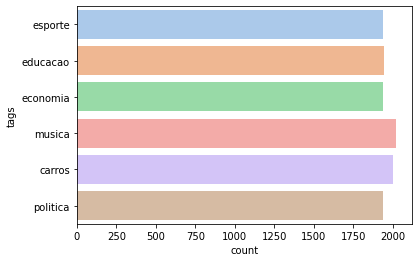

In [47]:
sns.countplot(y='tags', data=train_df, palette='pastel')


Transforma a coluna 'tags' que são as classificações em códigos.

In [48]:
le = LabelEncoder()
Y = le.fit_transform(train_df['tags'])


Visualiza os códigos das classes

In [49]:
Y


array([3, 2, 2, ..., 3, 4, 3])

Para visualizar as classes de textos

In [50]:
le.classes_


array(['carros', 'economia', 'educacao', 'esporte', 'musica', 'politica'],
      dtype=object)

Dividir os dados em treino e teste, parâmetro test_size.

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(train_df['post'], Y, test_size=0.2, random_state=5)

Definir pipeline, obter uma lista onde cada valor e cada item da lista é um tupla, na primeira uma extração de features e na segunda o classificador.

**Nota:** Uma feature nesse caso é uma palavra com TD-IDF

In [52]:
pipeline = Pipeline([
                     ('vectorizer', TfidfVectorizer()),
                     ('clf', LinearSVC())
                     ])

Para visualizar as classes que o pipeline está executando na sequência.

In [53]:
pipeline.steps


[('vectorizer',
  TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                  dtype=<class 'numpy.float64'>, encoding='utf-8',
                  input='content', lowercase=True, max_df=1.0, max_features=None,
                  min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                  smooth_idf=True, stop_words=None, strip_accents=None,
                  sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                  tokenizer=None, use_idf=True, vocabulary=None)),
 ('clf', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
            intercept_scaling=1, loss='squared_hinge', max_iter=1000,
            multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
            verbose=0))]

Fazer o treino do classificador SVM

In [54]:
pipeline.fit(X_train, Y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
          

**Avaliar o modelo com dados inéditos**

Nessa caso os dados que ele nunca viu são os dados para teste, por isso é separado dados de treino e dados de teste, para avaliar a capacidade do algoritmo classificar corretamente em dados novos.

**Nota:** A predição deve ser nos dados para teste.

Para saber se os dados que o algoritmo previu estão corretos é necessário medir a precisão/accurancy dos rótulos(classificações) previstos com os rotulos verdadeiros.

**pred** são os rótulos previstos

**Y_teste** são os rótulos verdadeiros


In [55]:
pred = pipeline.predict(X_test)


In [56]:
pred

array([2, 2, 1, ..., 5, 1, 5])

In [57]:
Y_test


array([2, 2, 1, ..., 5, 1, 5])

Obteve uma precisão de 91%

In [58]:
accuracy_score(Y_test, pred)

0.9103653355989805

Com o cassification_report é possível visualizar a precisão para cada rótulo.

Para visualizar as classes le.classes_

In [63]:
print(classification_report(Y_test, pred))


              precision    recall  f1-score   support

           0       0.93      0.96      0.94       389
           1       0.81      0.80      0.80       396
           2       0.95      0.93      0.94       403
           3       0.94      0.94      0.94       393
           4       0.95      0.96      0.95       413
           5       0.87      0.88      0.87       360

    accuracy                           0.91      2354
   macro avg       0.91      0.91      0.91      2354
weighted avg       0.91      0.91      0.91      2354



In [64]:
le.classes_


array(['carros', 'economia', 'educacao', 'esporte', 'musica', 'politica'],
      dtype=object)

Teste para verificar se classifica um classe corretamente.

Para fazer o print do nome da classe use

le.inverse_transform(prediction)

In [69]:
text = "Corinthias marca um gol no final da partida contra o Palmeiras"
prediction = pipeline.predict([text])
prediction


array([3])

In [70]:
le.inverse_transform(prediction)


array(['esporte'], dtype=object)

In [73]:
text = "Marrom 4 inicia sua turnê pelo mundo amanhã"
prediction = pipeline.predict([text])
prediction



array(['musica'], dtype=object)

In [74]:
le.inverse_transform(prediction)

array(['musica'], dtype=object)

Exportar o modelo para usar em produção.

In [76]:
joblib.dump(pipeline, "model.joblib")


['model.joblib']